# Overview
This notebook documents an experiment evaluating traditional machine learning algorithms were used on a dataset called UNSW_NB15_training-set.csv. The UNSW_NB15 dataset is a publicly available dataset used for network intrusion detection research. It contains a large collection of network traffic data captured in a lab environment, which simulates a typical small office network. The dataset includes both normal and malicious traffic, where the malicious traffic includes various types of attacks such as denial of service (DoS), port scanning, and remote-to-local (R2L) attacks. The dataset contains a total of 2.5 million network flows and includes both numerical and categorical features such as source IP address, destination IP address, protocol, and service type. The dataset is commonly used to develop and evaluate machine learning models for intrusion detection. The dataset was pre-processed by encoding categorical features and standardizing numerical features. The most important features for predicting the target variable 'label' (the label is attack traffic or not attack traffic) were identified using the SelectKBest method and mutual_info_classif function. The dataset was then split into training and testing sets, and four classifiers were evaluated based on their performance using metrics such as precision, recall, F1-score, and accuracy. Confusion matrices were also plotted for each classifier. The most important features for the classification task were displayed.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

from sklearn.preprocessing import LabelEncoder, StandardScaler, MultiLabelBinarizer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix



In [2]:
# Provide a file path to the dataset
file_path = "UNSW_NB15/UNSW_NB15_training-set.csv"
data = pd.read_csv(file_path)

## Preprocessing
### Encoding
This code is a preprocessing step for the UNSW_NB15 dataset to prepare it for machine learning algorithms. It uses the LabelEncoder method from the scikit-learn library to encode the categorical features of the dataset, which are 'proto', 'service', and 'state', into numerical values. This is necessary because most machine learning algorithms require numerical data to perform computations. The LabelEncoder method maps each unique value in the categorical feature to a corresponding numerical value. The resulting numerical values are stored in the same column as the original categorical values. The transformed data can now be used as input for machine learning algorithms.

In [3]:
# Preprocess the data
# Encode categorical features
le = LabelEncoder()
data['proto'] = le.fit_transform(data['proto'])
data['service'] = le.fit_transform(data['service'])
data['state'] = le.fit_transform(data['state'])

### Standardization
The code standardizes the numerical features of a dataset using the StandardScaler method from the scikit-learn library. Standardization is a common preprocessing technique used in machine learning to scale the data so that it has zero mean and unit variance. This is done to ensure that each feature contributes equally to the model's predictions and to prevent certain features from dominating others due to differences in scale.

The first line creates an instance of the StandardScaler class.

The second line identifies the numerical features in the dataset by selecting columns that contain numerical data. This is done by using the select_dtypes method from pandas with the argument include=[np.number] which includes all columns with numerical data types.

The third line applies the StandardScaler method to the selected numerical features of the dataset. It first fits the StandardScaler instance on the numerical features using the fit_transform method, which calculates the mean and standard deviation of each feature and then scales the data accordingly. Finally, it replaces the original numerical features in the dataset with their standardized versions.

After standardization, the data is ready for use in the machine learning models.

In [4]:
# Standardize numerical features
sc = StandardScaler()
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
data[numerical_features] = sc.fit_transform(data[numerical_features])

# Remove unnecessary features
data = data.drop(['id', 'attack_cat'], axis=1)


## Feature Selection
This code performs feature selection on a dataset using the SelectKBest method and mutual_info_classif function from the scikit-learn library. In the first two lines, the input data is split into features and labels. The 'label' column is removed from the feature set 'X', and the label values are mapped to binary values (0 or 1) and stored in 'y'. The third line creates an instance of the SelectKBest class with the mutual_info_classif function as the scoring function. This function measures the mutual information between each feature and the target variable 'y'. The 'k' parameter is set to 10, meaning that the top 10 features with the highest mutual information scores will be selected. The fourth line fits the selector on the feature set 'X' and label set 'y'. It then transforms the feature set 'X' to only include the selected features, which are stored in 'X_selected'. The fifth to ninth lines plot the mutual information scores of each feature. A bar plot is created using the scores obtained from the selector, and the x-axis is rotated 90 degrees to display the feature names vertically. The plot provides a visual representation of the importance of each feature in predicting the target variable.

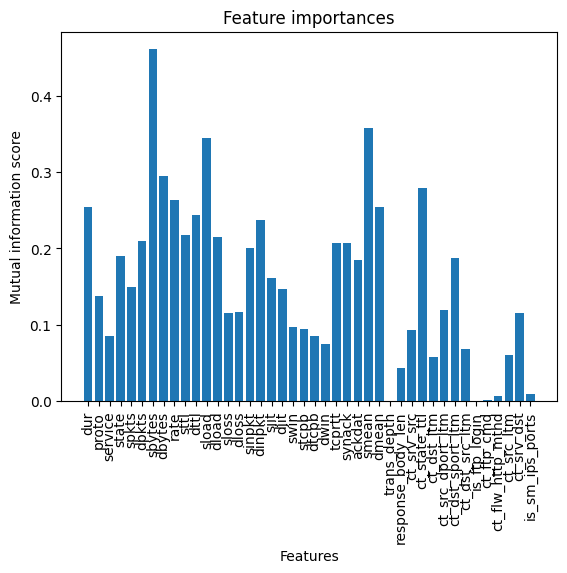

In [5]:
# Perform feature selection using SelectKBest and mutual_info_classif
X = data.drop(['label'], axis=1)
y = data['label'].replace({-1: 1, 0: 0}).astype(int)  # Replace -1 with 1 and 0 with 0 in the 'label' column
selector = SelectKBest(mutual_info_classif, k=10)
selector.fit(X, y)
X_selected = selector.transform(X)

# Plot feature importances
plt.bar(X.columns, selector.scores_)
plt.xticks(rotation=90)
plt.title("Feature importances")
plt.xlabel("Features")
plt.ylabel("Mutual information score")
plt.show()


## Model Trainng and Performance
This code splits the dataset into training and testing sets using the train_test_split function from the scikit-learn library. The function train_test_split is a method from the scikit-learn library used to split a dataset into training and testing sets. It randomly divides the data into two sets, one for training the model and another for evaluating its performance.

The function takes several parameters:

    X_selected: This parameter is the feature set, which is a two-dimensional array or dataframe of shape (n_samples, n_features) containing the features of the dataset. The feature set is split into training and testing sets.

    y: This parameter is the target variable, which is a one-dimensional array or dataframe of shape (n_samples,) containing the labels or outputs of the dataset. The target variable is split into training and testing sets.

    test_size: This parameter is a float or integer that specifies the size or proportion of the testing set. If it is a float, it represents the percentage of the data to use for testing, and if it is an integer, it represents the absolute number of samples to use for testing. By default, it is set to 0.2 or 20%.

    random_state: This parameter is an integer used to seed the random number generator. It is used to ensure reproducibility of the results. If it is set to a fixed value, the same random split will be obtained each time the function is called.

The function returns four arrays or dataframes: X_train, X_test, y_train, and y_test. X_train and y_train are the training sets, and X_test and y_test are the testing sets. The size of the testing set is determined by the test_size parameter, while the random_state parameter ensures that the same split is obtained each time the function is called with the same seed value.It then defines four classifiers, including Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM), using their respective classes from scikit-learn. The for-loop iterates through each classifier and trains them using the selected features from the training set 'X_train' and their corresponding labels 'y_train'. The trained classifiers are then used to predict the labels of the testing set 'X_test', which are stored in 'y_pred'. The performance of each classifier is evaluated by printing out the classification report and accuracy score using the classification_report and accuracy_score functions from scikit-learn. Finally, the confusion matrix is plotted for each classifier using the pd.crosstab function to calculate the confusion matrix and the matplotlib library to visualize it. The confusion matrix provides a visual representation of the performance of the classifier in classifying instances into the correct categories.

Logistic Regression:
              precision    recall  f1-score   support

          -1       0.68      0.67      0.68      7418
           0       0.73      0.74      0.74      9049

    accuracy                           0.71     16467
   macro avg       0.71      0.71      0.71     16467
weighted avg       0.71      0.71      0.71     16467

Accuracy: 0.7089330175502521



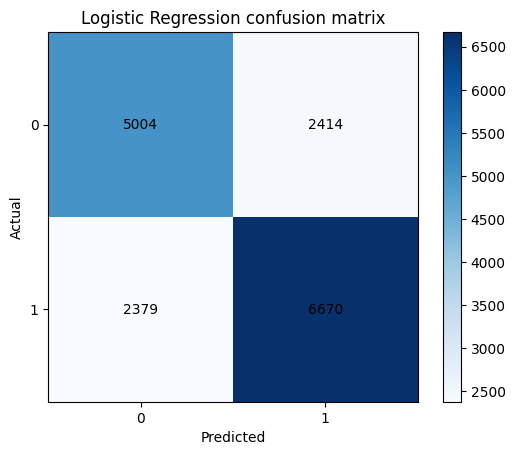

Decision Tree:
              precision    recall  f1-score   support

          -1       0.91      0.93      0.92      7418
           0       0.94      0.93      0.93      9049

    accuracy                           0.93     16467
   macro avg       0.92      0.93      0.93     16467
weighted avg       0.93      0.93      0.93     16467

Accuracy: 0.9260338859537256



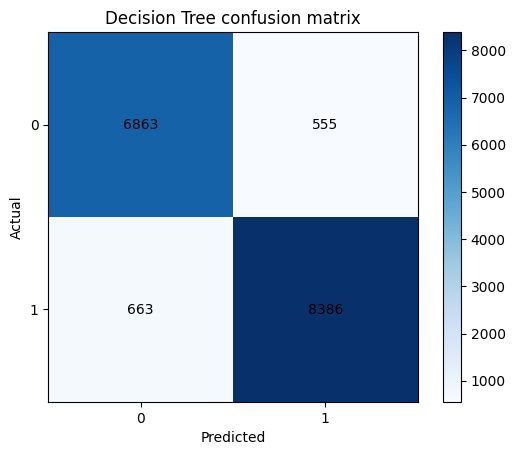

Random Forest:
              precision    recall  f1-score   support

          -1       0.92      0.94      0.93      7418
           0       0.95      0.93      0.94      9049

    accuracy                           0.94     16467
   macro avg       0.94      0.94      0.94     16467
weighted avg       0.94      0.94      0.94     16467

Accuracy: 0.9368433837371714



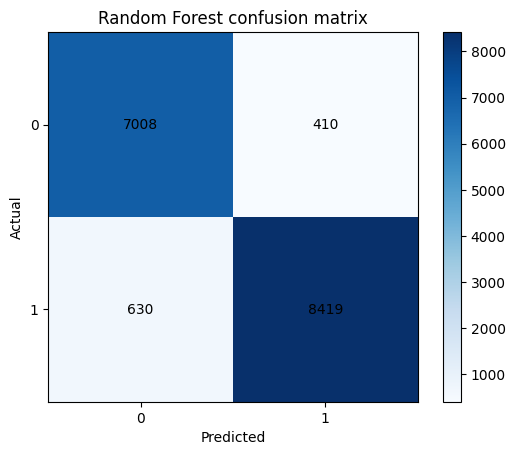

SVM:
              precision    recall  f1-score   support

          -1       0.79      0.86      0.82      7418
           0       0.87      0.81      0.84      9049

    accuracy                           0.83     16467
   macro avg       0.83      0.83      0.83     16467
weighted avg       0.83      0.83      0.83     16467

Accuracy: 0.8307524139187465



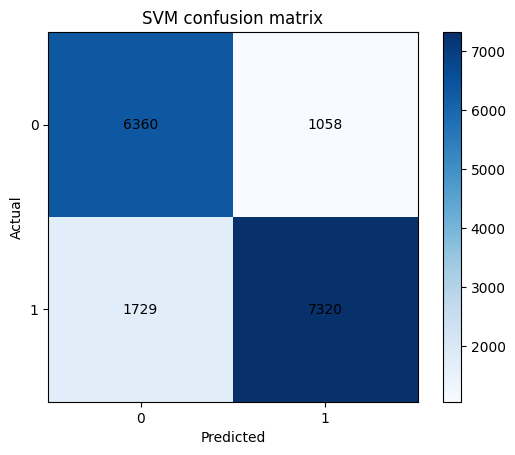

In [6]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()  # Use SVM classifier
}
# Train and test different classifiers
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{name}:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")

    # Plot confusion matrix
    cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    plt.figure()
    plt.title(f"{name} confusion matrix")
    plt.imshow(cm, cmap='Blues', interpolation='nearest')
    plt.colorbar()
    plt.xticks([0, 1])
    plt.yticks([0, 1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm.values[i, j]), ha="center", va="center")
    plt.show()

## Feature Importance
The code below displaying the top selected features based on the earlier feature selection process using SelectKBest with mutual_info_classif scoring function. The features are from the UNSW-NB15 dataset, which is a network traffic dataset used for intrusion detection system evaluation.

In [7]:
# Collect selected features
selected_features = X.columns[selector.get_support()]

### Selected Features
The output shows the top 10 selected features from the UNSW-NB15 dataset based on their mutual information score. These features are:

    'dur': The duration of the network connection.
    'sbytes': The total number of bytes sent by the source IP.
    'dbytes': The total number of bytes sent by the destination IP.
    'rate': The data rate (in bps) of the network connection.
    'dttl': The time-to-live (TTL) value of the destination IP.
    'sload': The source load, calculated as the total number of source bytes divided by the connection duration.
    'dinpkt': The inter-arrival time between packets sent by the destination IP.
    'smean': The mean size of packets sent by the source IP.
    'dmean': The mean size of packets sent by the destination IP.
    'ct_state_ttl': The count of connection states that have the same TTL value.

These features are considered the most important and informative for the given problem (intrusion detection) based on the mutual information score, which measures the dependency between the features and the target variable.

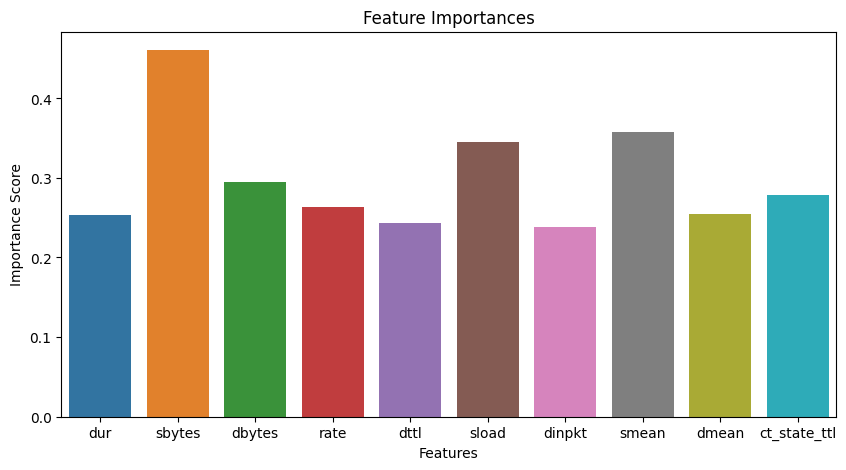

In [8]:
# Visualize feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=data.columns[:-1][selector.get_support()], y=selector.scores_[selector.get_support()])
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


## Commerical Tool Evaluation (ThatDot Novelty Detector)
The SelectKBest method was used to identify the most important features for a classification task in a cybersecurity dataset. Afterward, the dataset was preprocessed for the ThatDot Novelty Detector by discretizing continuous features into categorical data using the Freedman-Diaconis rule. The processed data was then fed into the ThatDot Novelty Detector, and novelty scores were extracted in JSON format for further analysis.

A decision tree classifier was trained on the novelty scores to establish an optimal boundary between normal and anomalous instances. The dataset was split into training and testing sets (80% and 20%, respectively), and the classifier's performance was evaluated using a classification report and accuracy score.

Finally, the combined performance of the ThatDot Novelty Detector and decision tree classifier was compared to a baseline determined earlier in this experiment using traditional machine learning algorithms, assessing the effectiveness of ThatDot in detecting novel and anomalous instances in cybersecurity.

In [9]:
# Provide a file path to the dataset
file_path = "UNSW_NB15/UNSW_NB15_training-set.csv"

df = pd.read_csv(file_path)
tags = df[['attack_cat', 'label']]

### Preprocessing
This code defines a function called "bin_dataframe" that takes two arguments: a pandas DataFrame "df" and a dictionary "num_bins_dict" that contains the desired number of bins for each numerical column in the DataFrame.

The function loops through each column in the DataFrame that has a numerical data type and determines the minimum and maximum values for that column. Then, it calculates the bin edges using the specified number of bins from the dictionary "num_bins_dict". It uses the numpy "arange" function to create the bin edges from the minimum to the maximum value of the column with the given number of bins.

After defining the bin edges, the code creates bin labels for each bin by iterating through the bin edges using a zip function, and creating a label for each bin. It uses the Pandas "cut" function to bin each numerical column in the DataFrame, using the previously defined bin edges and labels. The "cut" function assigns each data point in the column to a bin based on the corresponding bin edge, and the labels for that bin.

Finally, the code assigns values outside of the bin edges to the smallest or largest bin by checking if the minimum or maximum value of the column is missing, and adding the corresponding bin label to the column using the Pandas "cat" function. If the minimum or maximum value is missing, the code fills the corresponding row with the bin label. The function then returns the modified DataFrame.

#### Binning

In [10]:
def bin_dataframe(df, num_bins_dict):
    # Loop through each column in the DataFrame
    for col in df.select_dtypes(include=[np.number]).columns:
        # Determine the minimum and maximum value of the column
        col_min = df[col].min()
        col_max = df[col].max()
        
        # Define the bin edges for the column using the specified number of bins
        bin_width = (col_max - col_min) / num_bins_dict[col]
        bin_edges = np.arange(col_min, col_max + bin_width, bin_width)
        
        # Define the bin labels for the column
        bin_labels = [f'{i:.2f}-{j:.2f}' for i,j in zip(bin_edges[:-1], bin_edges[1:])]
        
        # Use the pandas cut() function to bin the column
        df[col] = pd.cut(df[col], bins=bin_edges, labels=bin_labels, include_lowest=True, right=False)
        
        # Assign values outside of the bin edges to the smallest or largest bin
        if df[col].min() == np.nan:
            df[col].cat.add_categories(bin_labels[0], inplace=True)
            df[col].fillna(bin_labels[0], inplace=True)
        if df[col].max() == np.nan:
            df[col].cat.add_categories(bin_labels[-1], inplace=True)
            df[col].fillna(bin_labels[-1], inplace=True)
        
    return df

#### Optimizing Bins
The "optimal_num_bins" function takes a pandas DataFrame "df" as input and returns a dictionary "num_bins_dict" containing the optimal number of bins for each numerical column in the DataFrame.

The function first creates an empty dictionary to store the number of bins for each numerical column. It then loops through each numerical column in the DataFrame using the "select_dtypes" method of pandas with the "include" parameter set to "np.number".

For each column, the function calculates the optimal bin width using the Freedman-Diaconis rule. The bin width is defined as 3.5 times the standard deviation of the data, divided by the cube root of the number of data points.

Next, the function calculates the number of bins for the column by dividing the range of the data (the difference between the maximum and minimum values) by the bin width, and rounding down to the nearest integer. The number of bins is then stored in the "num_bins_dict" dictionary using the column name as the key.

Finally, the function returns the "num_bins_dict" dictionary containing the optimal number of bins for each numerical column in the DataFrame.

In [11]:
def optimal_num_bins(df):
    num_bins_dict = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        data = df[col].dropna()
        bin_width = 3.5 * np.std(data) / np.cbrt(len(data))
        num_bins = int((data.max() - data.min()) / bin_width)
        num_bins_dict[col] = num_bins
    return num_bins_dict

## Testing with Classifier
This code is related to the feature importances discovered in the first part of the analysis, where a machine learning model was used to identify the most important features for classifying network traffic as either normal or malicious.

The code defines a list of columns called "columns_to_keep", which includes the features that were found to be important in the previous analysis. The code then uses the pandas "loc" function to filter the original DataFrame to only include the specified columns.

Next, the code calculates the optimal number of bins for each numerical column in the filtered DataFrame using the "optimal_num_bins" function. The resulting dictionary of bin numbers is then used to bin all of the numerical columns in the filtered DataFrame using the "bin_dataframe" function.

After binning the data, the code selects the "attack_cat" and "label" columns from a separate DataFrame called "tags" and adds them to the binned DataFrame using the Pandas "loc" function. The resulting DataFrame is then converted to a string format and exported as a CSV file called "binned_values.csv".


In [12]:
# Load the dataset
df = pd.read_csv(file_path)

# Define a list of columns to keep in the DataFrame
columns_to_keep = ['service','state','dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload']

# Use the loc function to filter the DataFrame to only include the specified columns
df = df.loc[:, columns_to_keep]

num_bins_dict = optimal_num_bins(df)

# Bin all the columns of the DataFrame using the bin_dataframe() function
df_binned = bin_dataframe(df, num_bins_dict)
df_binned[['attack_cat', 'label']] = tags[['attack_cat', 'label']]
df_binned=df_binned.astype(str)
df_binned.to_csv('binned_values.csv', index=False)

df_binned

,service,state,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,attack_cat,label
0,-,INT,0.00-0.38,1.00-11.77,0.00-9.31,24.00-13840.89,0.00-12194.29,84337.35-96385.54,246.77-255.00,0.00-9.73,173670338.11-188142866.29,0.00-192788.04,Normal,0
1,-,INT,0.00-0.38,1.00-11.77,0.00-9.31,24.00-13840.89,0.00-12194.29,120481.93-132530.12,246.77-255.00,0.00-9.73,868351690.55-882824218.73,0.00-192788.04,Normal,0
2,-,INT,0.00-0.38,1.00-11.77,0.00-9.31,24.00-13840.89,0.00-12194.29,192771.08-204819.28,246.77-255.00,0.00-9.73,853879162.37-868351690.55,0.00-192788.04,Normal,0
3,-,INT,0.00-0.38,1.00-11.77,0.00-9.31,24.00-13840.89,0.00-12194.29,156626.51-168674.70,246.77-255.00,0.00-9.73,593373655.21-607846183.38,0.00-192788.04,Normal,0
4,-,INT,0.00-0.38,1.00-11.77,0.00-9.31,24.00-13840.89,0.00-12194.29,96385.54-108433.74,246.77-255.00,0.00-9.73,839406634.20-853879162.37,0.00-192788.04,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,-,INT,0.00-0.38,1.00-11.77,0.00-9.31,24.00-13840.89,0.00-12194.29,192771.08-204819.28,246.77-255.00,0.00-9.73,72362640.88-86835169.05,0.00-192788.04,Normal,0
82328,-,FIN,0.76-1.14,11.77-22.55,0.00-9.31,13840.89-27657.78,0.00-12194.29,0.00-12048.19,246.77-255.00,243.27-253.00,0.00-14472528.18,0.00-192788.04,Normal,0
82329,-,INT,0.00-0.38,1.00-11.77,0.00-9.31,24.00-13840.89,0.00-12194.29,0.00-12048.19,0.00-8.23,0.00-9.73,0.00-14472528.18,0.00-192788.04,Normal,0
82330,-,INT,0.00-0.38,1.00-11.77,0.00-9.31,24.00-13840.89,0.00-12194.29,0.00-12048.19,0.00-8.23,0.00-9.73,0.00-14472528.18,0.00-192788.04,Normal,0


### Data Cardinality

This code is particularly important when using the ThatDot Novelty Detector, as the detector requires data to be fed in order of increasing cardinality for optimal performance.

By sorting the cardinalities of each column in the DataFrame in descending order, this code provides a way to identify the columns with the highest cardinality and ensure that they are fed to the novelty detector last. This approach can potentially improve the performance of the detector by allowing it to more efficiently process the data, particularly when dealing with high-dimensional data.

In [13]:
# Determine the cardinality of each column in the DataFrame and sort in descending order
cardinality = df.nunique().sort_values(ascending=False)

# Print the cardinaity of each column
print(cardinality)

sload         184
dpkts         145
dur           143
spkts         129
dbytes        123
sbytes         99
dload          97
rate           17
service        13
attack_cat     10
state           7
dttl            6
sttl            4
label           2
dtype: int64


### Classifiying Novelty Detector Output and System Performance
This code performs a machine learning analysis using a decision tree classifier on data extracted from a JSON file called "thatdot.json". The JSON file contains data on network traffic records and whether they were classified as normal or potentially malicious by the ThatDot Novelty Detector. The first section of the code loads the JSON file, extracts the "sample" section as a list of dictionaries, and converts it to a pandas DataFrame. The code also drops the "mostNovelComponent" column from the DataFrame and extracts the "label" column as the target variable for classification. Next, the code uses the "MultiLabelBinarizer" function from the scikit-learn library to convert the target variable to a binary array. The data is then split into training and testing sets using the "train_test_split" function from scikit-learn.

A decision tree classifier is then trained on the training set using the "DecisionTreeClassifier" function from scikit-learn. The resulting classifier is evaluated on the testing set using the "predict" method of the classifier and the "accuracy_score" and "classification_report" functions from scikit-learn. The "accuracy_score" function calculates the accuracy of the classifier on the testing set, while the "classification_report" function provides a more detailed summary of the classifier's performance, including precision, recall, and F1-score for each class in the target variable.

The use of a decision tree classifier to classify the output of ThatDot Novelty Detector can be seen as a form of semi-supervised learning.

Semi-supervised learning is a type of machine learning where a combination of labeled and unlabeled data is used to train a model. In this case, the output of the ThatDot Novelty Detector can be thought of as providing a set of labels indicating whether each network traffic record is "normal" or "novel". However, the novelty detector may not be perfectly accurate, and some of the labeled data may be incorrect. Therefore, the classification of the output from the novelty detector can be considered a form of "pseudo-labeling", where the novelty detector's output is treated as the ground truth for training a decision tree classifier.

The decision tree classifier can then be trained on the labeled output from the novelty detector along with any additional labeled data that may be available, such as data from previous attacks. This approach can potentially improve the accuracy of the classifier by incorporating the output from the novelty detector, even though the novelty detector itself is not a classifier.

In [14]:
# Load the JSON file
with open('thatdot.json', 'r') as f:
    data = json.load(f)

# Extract the "sample" section as a list of dictionaries
sample_data = data["sample"]

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(sample_data)

# Drop the "mostNovelComponent" column from the DataFrame
df[['attack_cat', 'label']] = pd.DataFrame(df['tag'].tolist(), index=df.index)
df = df.drop(columns=["mostNovelComponent", "tag"])
# Print the resulting DataFrame
df

# Extract the features and target variable
X = df[["probability", "uniqueness", "infoContent"]]
y = df["label"]

# Convert the target variable to a binary array
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = clf.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy score: 0.855
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        89
           1       0.89      0.85      0.87       111

   micro avg       0.85      0.85      0.85       200
   macro avg       0.85      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200
 samples avg       0.85      0.85      0.85       200

